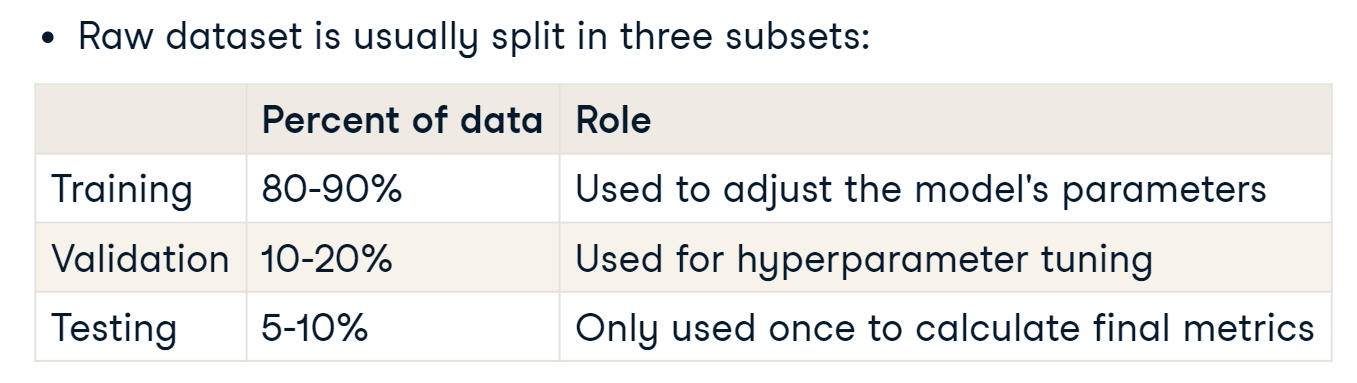

When we start a new project, we first split our data into these three sets to ensure we have enough data to train and evaluate our model. 


#### Accuracy & Loss

In classification tasks, we use accuracy to measure how well a model correctly predicts ground truth labels. 

In other tasks, we use loss to measure how well a model is performing.

#### **Calculating Training Loss**

for each epoch, we sum the loss for each iteration of the training set dataloader and at the end of the epoch, we calculate the mean training loss.

In [ ]:
# example framework

training_loss = 0.0

for i, data in enumerate(trainloader, 0):
    # running forward pass
    # 
    # 
    
    # Calculating the loss
    loss = criterion(outputs, labels)
    # Calculate gradients
    # 
    
    # Calculate and sum the loss
    training_loss += loss.item()

epoch_loss = training_loss / len(trainloader)

#### **Calculating Validation Loss**

In [ ]:
# Example framework

validation_loss = 0.0

# putting model in evaluation mode as some layers in pytorch perform differently in training and evaluation phases.
model.eval()

with torch.no_grad():   # indicating the model that we won't be upgrading the gradients, hence improving the speed of forward pass
    for i, data in enumerate(validationloader, 0):
        # running the forward pass
        # 
        # 
        
        # Calculating the loss
        loss = criterion(outputs, labels)
        validation_loss += loss.item()
    
epoch_loss = validation_loss / len(validationloader)
model.train() # We again put model in training mode so that we can again evaluate the model.

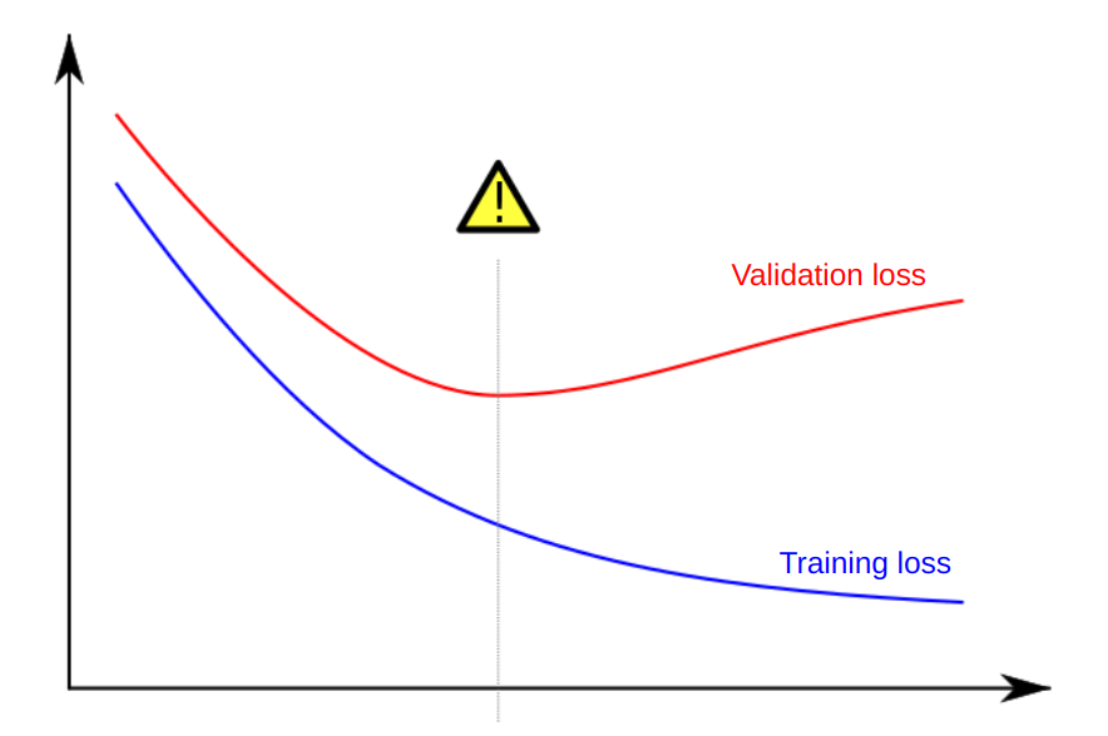

If Validation loss is high and training loss is not, it indicates overfitting! 

#### Calculating accuracy with torchmetrics

we can create accuracy metrics for classification problems using torchmetrics

In [ ]:
# example framework

import torchmetrics

metric = torchmetrics.Accuracy(task = 'multiclass', num_classes = 3)
for i, data in enumerate(dataloader, 0):
    features, labels = data
    outputs = model(features)
    
    # calculating accuracy over the batch
    acc = metric(output, labels.argmax(dim=-1))

# calculating accuracy over whole epoch
acc = metric.compute()
print(f"Accuracy on all data: {acc}")

# Reset the metric for the next epoch (training or validation)
metric.reset()

# we can use the same method above for training and validation evaluation

#### Dealing with Overfitting 

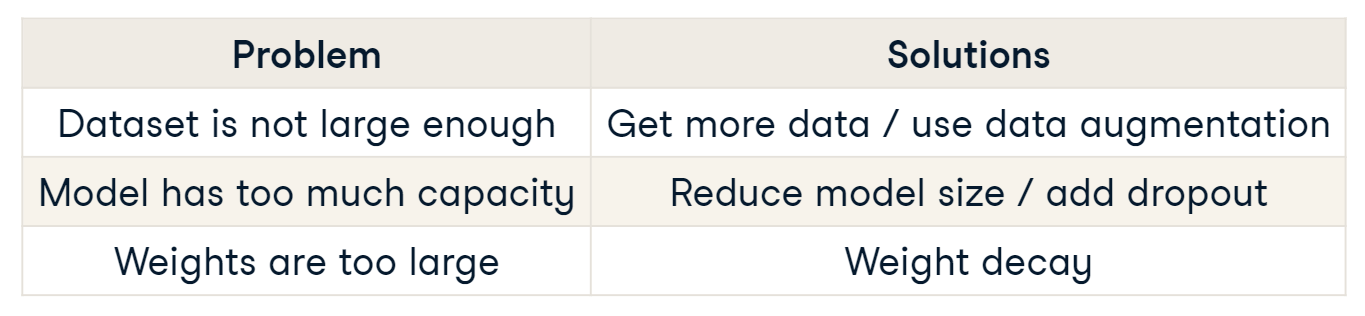

We can do the following to deal with overfitting -
- reducing model size or adding dropout layer
  - this randomly reduces some input tensors to zero during training (temporarily)
- using weight decay to force parameters to remain small
- obtaining new data or augmenting data

#### **Dropout**

In [ ]:
# Example implementation framework

model = nn.Sequential(nn.Linear(8, 4),
                      nn.ReLU(),
                      nn.Dropout(p=0.5))

features = torch.randn((1, 8))
model(i)

Dropout behaves differently for training and evaluation, hence, we must remember to switch model using `model.train()` and `model.eval()`

#### Regularization with **weight decay**

Weight Decay adds penalty to loss function, discouraging it to reach large weights and biases. The higher the weight_decay parameter, the less likely that the model will overfit. 

We define weight decay during the optimizer definition in PyTorch using the `weight_decay` argument, and we can adjust it's value between zero and one, typically a small value like `1e-3`.

In [ ]:
# Example implementation

optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)

#### Steps to maximize model performance -

1. Overfit the training set.
2. Reduce Overfitting
3. Fine-tune Hyperparameters

##### 1. Overfitting the training set
To overfit the model, we can first modify the training loop to overfit a single data point (batch size of 1).
e.g. -
```python
features, labels = next(iter(trainloader))
for i in range(1e3):
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
```

The goal of the above step is to reach `accuracy = 1.0` and `loss = 0.0`
This also helps us find bugs in the code.

we can now overfit the whole training set and at this point, we should not try to modify the model architecture and use an existing one if possible. 

The model should be large enough that it can fit to the training set.

The hyperparameters like learning rate should be kept at their default values.
<br><br>

##### 2. Reducing Overfitting 

Now our goal is to experiment with dropout, data augmentation, weight decay and reducing model capacity. 

During this, we must keep track of each hyperparameter and report maximum validation accuracy.
<br><br>

##### 3. Fine-tune Hyperparameters

we can perform `grid search` over different hyperparameters. It searches for values of hyperparameters between a constant interval.
Usually, this is done on the hyperparameters such as learning rate or momentum. 

e.g, let's say we are implementing random search on the learning rate hyperparameter.
```python
for factor in range(2, 6):
    lr = 10 ** -factor
```


We can also use `random search` to search for values of hyperparameters by randomly sampling values between a interval.
This can yield better results than grid search.

e.g, let's say we are implementing random search on the learning rate hyperparameter.
```python
factor = np.random.uniform(2, 6)
lr = 10 ** -factor
```


#### **Evaluating Image Classifiers**

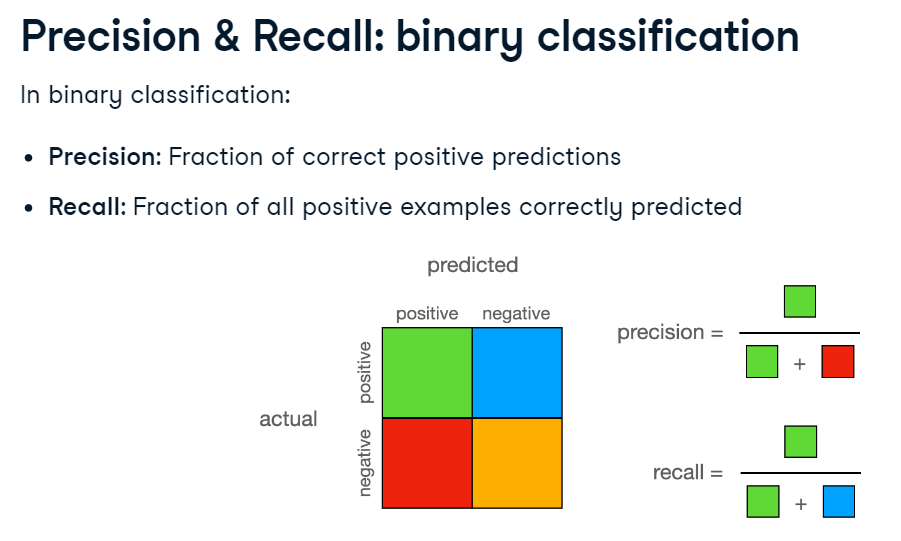

For multi-class classification, we can get separate precision and recall for each class.
